Basic ARIMA

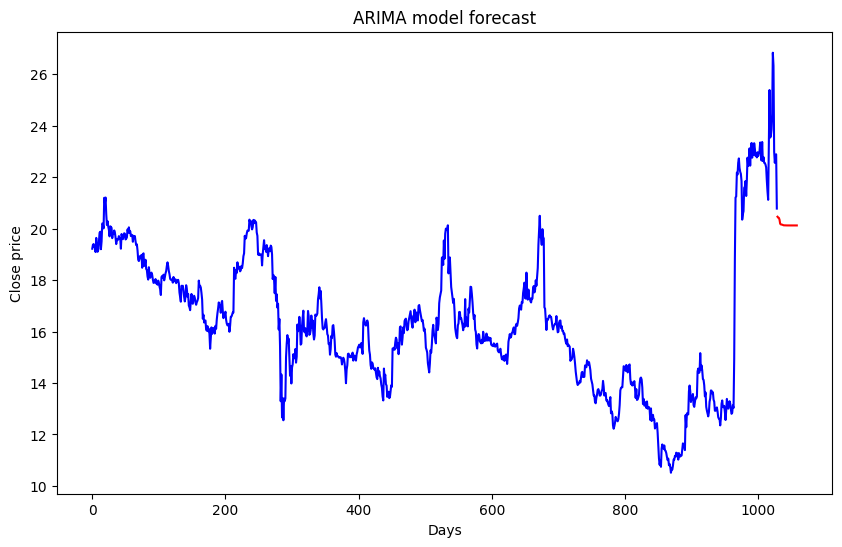

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv('MANU_3 years.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
series = df['Close'].values
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
n_periods = 30
forecast = model_fit.forecast(steps=n_periods)
plt.figure(figsize=(10,6))
plt.plot(series, color='blue')
plt.plot(range(len(series), len(series)+n_periods), forecast, color='red')
plt.title('ARIMA model forecast')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

train = series[:-n_periods]
test = series[-n_periods:]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n_periods)
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Create a DataFrame to display the results
results_df = pd.DataFrame({"Metric": ["MSE", "RMSE", "MAPE"], "Value": [mse, rmse, mape]})
print(results_df)


  Metric     Value
0    MSE  1.764724
1   RMSE  1.328429
2   MAPE  3.516104


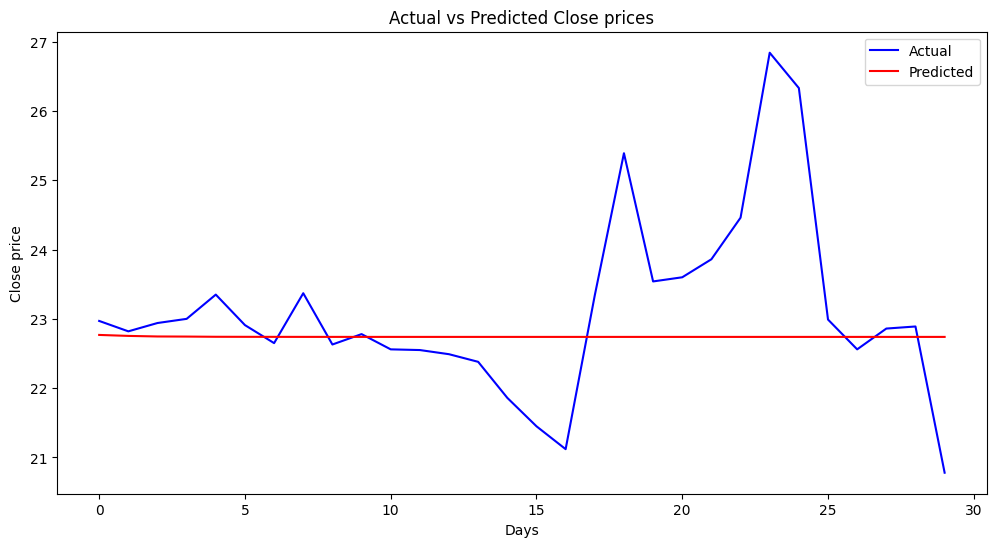

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test, color='blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.title('Actual vs Predicted Close prices')
plt.legend()
plt.show()

5 fold CV and hyperparameter tuning from ARIMA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

class ARIMAEstimator(BaseEstimator):
    def __init__(self, order=(1, 0, 0)):
        self.order = order

    def fit(self, X, y=None):
        self.model_ = ARIMA(X, order=self.order)
        self.results_ = self.model_.fit()
        return self

    def predict(self, X):
        return self.results_.forecast(steps=len(X))[0]


df = pd.read_csv('MANU_3 years.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
series = df['Close'].values
model = ARIMAEstimator()

# Defining the grid of ARIMA orders to search over
param_grid = {'order': [(p, 1, q) for p in range(3) for q in range(3)]}

# Using TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Using GridSearchCV to find the best ARIMA parameters
gscv = GridSearchCV(estimator=model, cv=tscv, param_grid=param_grid, scoring='neg_mean_squared_error')
gscv.fit(series)

# Printing the best ARIMA order and corresponding score
print("Best ARIMA order:", gscv.best_params_)
print("Corresponding score:", -gscv.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


Best ARIMA order: {'order': (0, 1, 0)}
Corresponding score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


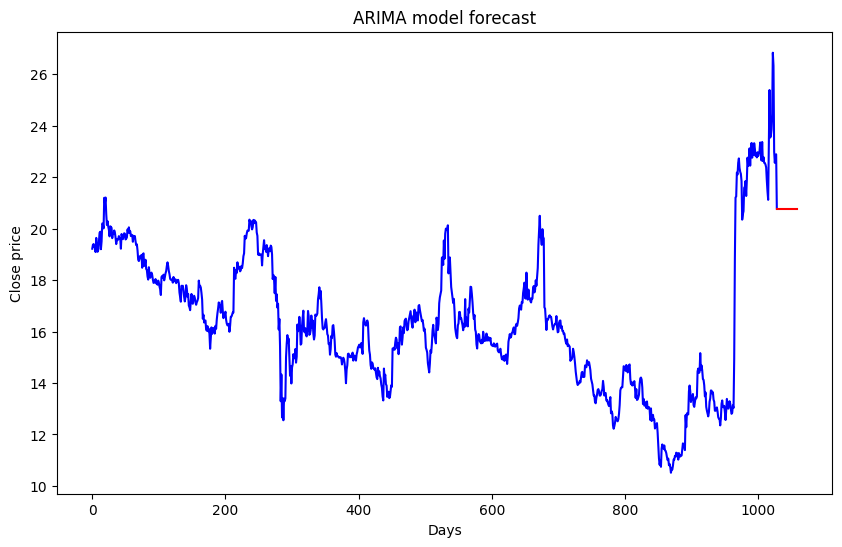

  Metric     Value
0    MSE  1.764724
1   RMSE  1.328429
2   MAPE  3.516104


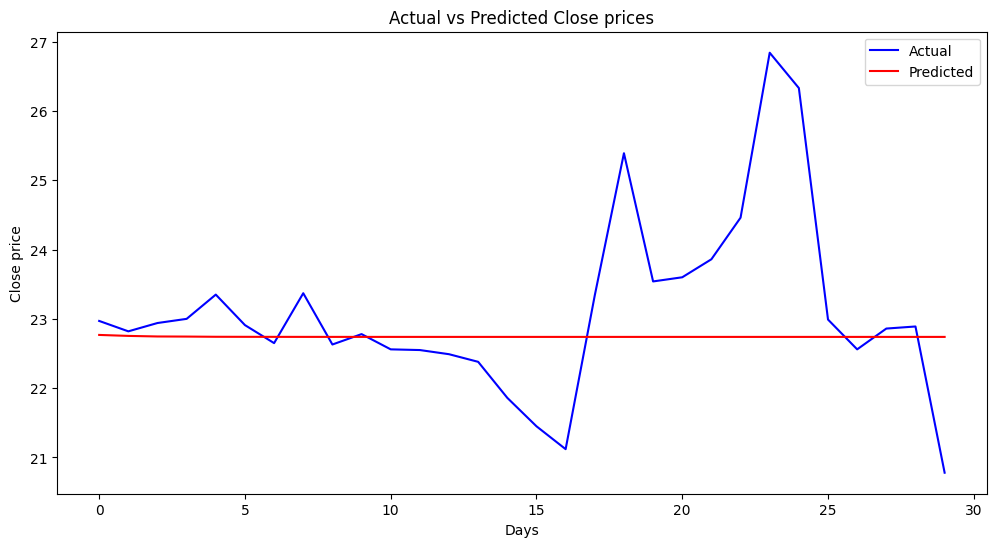

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv('MANU_3 years.csv')

# Converting 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Setting 'Date' as the index
df.set_index('Date', inplace=True)

# Selecting the 'Close' prices and convert to numpy array
series = df['Close'].values

model = ARIMA(series, order=(0,1,0))

# Fitting the model
model_fit = model.fit()
n_periods = 30

# Generating forecast
forecast = model_fit.forecast(steps=n_periods)

# Plotting the original series and the forecasted values
plt.figure(figsize=(10,6))
plt.plot(series, color='blue')
plt.plot(range(len(series), len(series)+n_periods), forecast, color='red')
plt.title('ARIMA model forecast')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

train = series[:-n_periods]
test = series[-n_periods:]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n_periods)

# Calculating evaluation metrics
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Creating a DataFrame to display the results
results_df = pd.DataFrame({"Metric": ["MSE", "RMSE", "MAPE"], "Value": [mse, rmse, mape]})
print(results_df)

import matplotlib.pyplot as plt

# Actual vs Predicted plot
plt.figure(figsize=(12,6))
plt.plot(test, color='blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.title('Actual vs Predicted Close prices')
plt.legend()
plt.show()


LSTM model for predicting synthetic data

Fitting 10 folds for each of 32 candidates, totalling 320 fits


<ipython-input-1-1314116635ca>:47: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Epoch 1/10
115/115 [==============================] - 5s 18ms/step - loss: 0.1272 - val_loss: 0.3665
Epoch 2/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0619 - val_loss: 0.3880
Epoch 3/10
115/115 [==============================] - 2s 19ms/step - loss: 0.0477 - val_loss: 0.1849
Epoch 4/10
115/115 [==============================] - 2s 20ms/step - loss: 0.0480 - val_loss: 0.1480
Epoch 5/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0453 - val_loss: 0.1217
Epoch 6/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0392 - val_loss: 0.0756
Epoch 7/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0356 - val_loss: 0.1262
Epoch 8/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0308 - val_loss: 0.0775
Epoch 9/10
115/115 [==============================] - 2s 14ms/step - loss: 0.0306 - val_loss: 0.0941
Epoch 10/10
115/115 [==============================] - 2s 16ms/step - loss: 0.0307 - val_lo

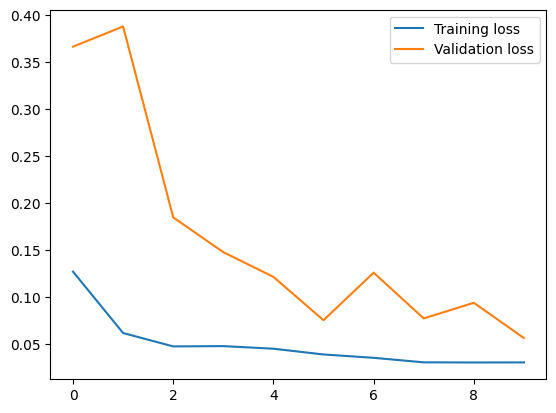

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

df = pd.read_csv('MANU_3 years.csv')

train_dates = pd.to_datetime(df['Date'])

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainX = []
trainY = []

n_future = 1
n_past = 14

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

def create_model(optimizer='adam', lstm1_units=64, lstm2_units=32, dropout_rate=0.2, batch_size=None):
    model = Sequential()
    model.add(LSTM(lstm1_units, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(lstm2_units, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {
    'epochs': [5, 10],
    'batch_size': [8, 16],
    'optimizer': ['adam'],
    'lstm1_units': [32, 64],
    'lstm2_units': [16, 32],
    'dropout_rate': [0.1, 0.2]
}
tscv = TimeSeriesSplit(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, verbose=2, n_jobs=-1)

grid_result = grid.fit(trainX, trainY)

best_params = grid_result.best_params_.copy()
best_params.pop('epochs')
best_params.pop('batch_size')

best_model = create_model(**best_params)

history = best_model.fit(trainX, trainY, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split=0.1, verbose=1)

best_model.summary()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


1/1 [==============================] - 2s 2s/step
          Date       Open
0   2023-03-01  23.430326
1   2023-03-02  23.304056
2   2023-03-03  23.324970
3   2023-03-06  23.387648
4   2023-03-07  23.715597
5   2023-03-08  23.477245
6   2023-03-09  23.151560
7   2023-03-10  23.523512
8   2023-03-13  23.251198
9   2023-03-14  23.129446
10  2023-03-15  23.039387
11  2023-03-16  22.963444
12  2023-03-17  22.842932
13  2023-03-20  22.785776
14  2023-03-21  22.295948


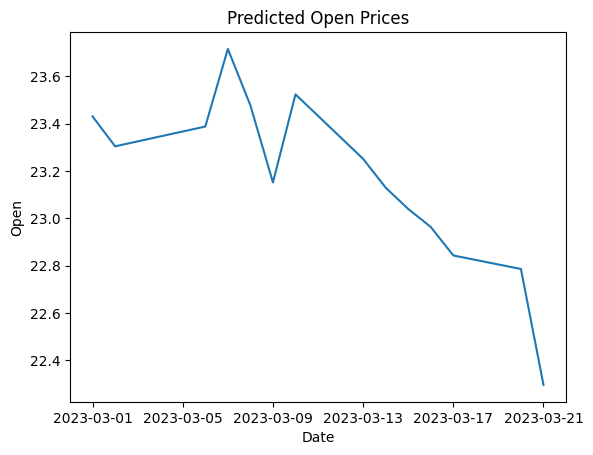

In [ ]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 14
n_days_for_prediction = 15
start_date_index = train_dates[train_dates == '2023-02-27'].index[0]

# Getting the prediction period dates
predict_period_dates = pd.date_range('2023-03-01', periods=n_days_for_prediction, freq=us_bd)

# Preparing the input for prediction
n_days_for_prediction_input = len(predict_period_dates)
prediction_input = trainX[-n_days_for_prediction_input-n_past:-n_past]

# Making prediction
prediction = best_model.predict(prediction_input)  # shape = (n, 1) where n is the n_days_for_prediction_input

#Performing inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

# Converting timestamp to date
forecast_dates = [d.date() for d in predict_period_dates]

# Creating dataframe with predicted values
df_forecast = pd.DataFrame({'Date': forecast_dates, 'Open': y_pred_future})
print(df_forecast)
# Plotting the predicted Open prices against dates
sns.lineplot(data=df_forecast, x="Date", y="Open")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Predicted Open Prices")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Getting training and validation predictions
y_train_pred = best_model.predict(trainX)
y_val_pred = best_model.predict(trainX[-int(0.1 * len(trainX)):])

# Performing inverse transformation to rescale back to original range
y_train_pred_copies = np.repeat(y_train_pred, df_for_training.shape[1], axis=-1)
y_train_pred_inv = scaler.inverse_transform(y_train_pred_copies)[:, 0]

y_val_pred_copies = np.repeat(y_val_pred, df_for_training.shape[1], axis=-1)
y_val_pred_inv = scaler.inverse_transform(y_val_pred_copies)[:, 0]

# Computing error metrics
mse_train = mean_squared_error(trainY[:-int(0.1 * len(trainY))], y_train_pred[:-int(0.1 * len(trainY))])
mse_val = mean_squared_error(trainY[-int(0.1 * len(trainY)):], y_val_pred)

mae_train = mean_absolute_error(trainY[:-int(0.1 * len(trainY))], y_train_pred[:-int(0.1 * len(trainY))])
mae_val = mean_absolute_error(trainY[-int(0.1 * len(trainY)):], y_val_pred)

rmse_train = sqrt(mse_train)
rmse_val = sqrt(mse_val)

mape_train = mean_absolute_percentage_error(trainY[:-int(0.1 * len(trainY))], y_train_pred[:-int(0.1 * len(trainY))])
mape_val = mean_absolute_percentage_error(trainY[-int(0.1 * len(trainY)):], y_val_pred)

# Creating performance DataFrame
error_metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'MAPE'],
    'Training': [mse_train, mae_train, rmse_train, mape_train],
    'Validation': [mse_val, mae_val, rmse_val, mape_val]
})

print(error_metrics_df)


4/4 [==============================] - 0s 10ms/step
  Metric   Training  Validation
0    MSE   0.011716    0.057137
1    MAE   0.076473    0.138728
2   RMSE   0.108239    0.239034
3   MAPE  88.597149   55.153346


Transformer implementation for prediction

<ipython-input-4-0398ab39c3d6>:81: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(


Fitting 10 folds for each of 48 candidates, totalling 480 fits


Best MSE: -0.007949 using {'batch_size': 32, 'dense_units': 64, 'dropout_rate': 0.1, 'epochs': 10, 'num_heads': 4}
Epoch 1/10
23/23 [==============================] - 3s 46ms/step - loss: 0.0388 - val_loss: 0.0622
Epoch 2/10
23/23 [==============================] - 1s 40ms/step - loss: 0.0098 - val_loss: 0.0479
Epoch 3/10
23/23 [==============================] - 1s 39ms/step - loss: 0.0086 - val_loss: 0.0497
Epoch 4/10
23/23 [==============================] - 1s 36ms/step - loss: 0.0086 - val_loss: 0.0540
Epoch 5/10
23/23 [==============================] - 1s 35ms/step - loss: 0.0088 - val_loss: 0.0517
Epoch 6/10
23/23 [==============================] - 1s 29ms/step - loss: 0.0083 - val_loss: 0.0524
Epoch 7/10
23/23 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0574
Epoch 8/10
23/23 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0571
Epoch 9/10
23/23 [==============================] - 1s 22ms/step - loss: 0.0086 - val_loss: 0

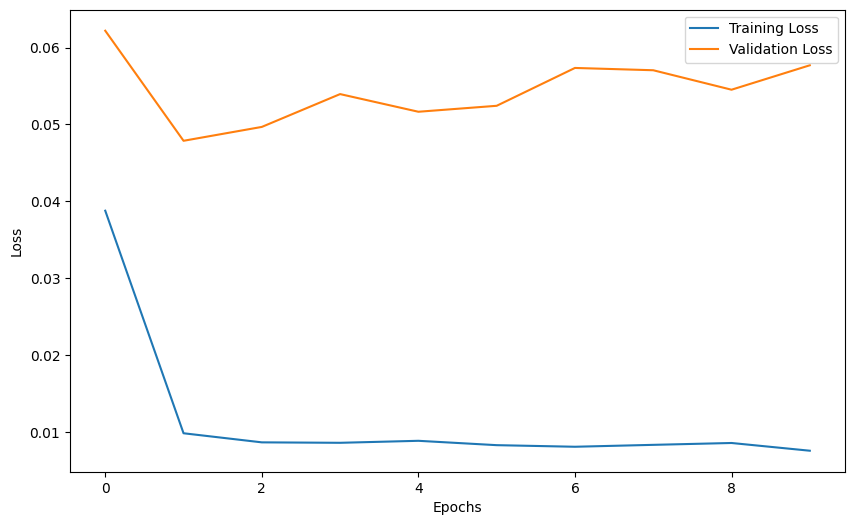

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from keras.models import Model
from keras.layers import Input, MultiHeadAttention, Dense, Flatten
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:(i + seq_len)])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 90 # Sequence length
split_ratio = 0.8  # Train-test split ratio

def preprocess_data(data, seq_len, split_ratio):
    # Kept only the 'Open' prices
    prices = data[['Open']]

    # Normalized the data
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.values)

    # Splitting the data into training and test sets
    train_data_len = int(prices_scaled.shape[0] * split_ratio)
    train_data = prices_scaled[:train_data_len]
    test_data = prices_scaled[train_data_len - seq_len:]

    # Creating sequences
    X_train, y_train = create_sequences(train_data, seq_len)
    X_test, y_test = create_sequences(test_data, seq_len)

    # Reshaping input to the required format for transformers
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    return X_train, y_train, X_test, y_test, prices_scaled, scaler

def build_transformer_model_with_dropout(input_shape, num_heads, dropout_rate, dense_units):
    input_layer = Input(shape=input_shape)
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[1])(input_layer, input_layer, input_layer)
    dropout = Dropout(dropout_rate)(attention)
    flatten = Flatten()(dropout)
    dense = Dense(dense_units, activation='relu')(flatten)
    output_layer = Dense(1)(dense)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

def create_model(input_shape, num_heads=8, dropout_rate=0.2, dense_units=128):
    model = build_transformer_model_with_dropout(input_shape, num_heads, dropout_rate, dense_units)
    return model

data = pd.read_csv('MANU_3 years.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

X_train, y_train, X_test, y_test, prices_scaled, scaler = preprocess_data(data, SEQ_LEN, split_ratio)

input_shape = (SEQ_LEN, 1)

param_grid = {
    'epochs': [10, 20, 40],
    'batch_size': [16, 32],
    'num_heads': [4, 8],
    'dropout_rate': [0.1, 0.2],
    'dense_units': [64, 128]
}

model = KerasRegressor(
    build_fn=lambda num_heads, dropout_rate, dense_units: create_model(
        input_shape=input_shape, num_heads=num_heads, dropout_rate=dropout_rate, dense_units=dense_units
    ),
    verbose=0
)

tscv = TimeSeriesSplit(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv, verbose=1)
grid_result = grid.fit(X_train, y_train)

print("Best MSE: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']
best_num_heads = grid_result.best_params_['num_heads']
best_dropout_rate = grid_result.best_params_['dropout_rate']
best_dense_units = grid_result.best_params_['dense_units']

best_model = build_transformer_model_with_dropout(input_shape, num_heads=best_num_heads, dropout_rate=best_dropout_rate, dense_units=best_dense_units)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train,
    batch_size=best_batch_size,
    epochs=best_epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

best_model.summary()

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


7/7 [==============================] - 0s 12ms/step
               MAE        MSE      RMSE       MAPE
Training  1.067889   2.077989  1.441523   6.521853
Testing   2.828729  15.746558  3.968193  15.339457
1/1 [==============================] - 0s 23ms/step
            Predicted Open
2023-03-01       18.777843
2023-03-02       18.791927
2023-03-03       18.841656
2023-03-06       18.889297
2023-03-07       18.925886
2023-03-08       18.984661
2023-03-09       19.018482
2023-03-10       19.074148
2023-03-13       19.139465
2023-03-14       19.194183
2023-03-15       19.240189
2023-03-16       19.289234
2023-03-17       19.341545
2023-03-20       19.381866
2023-03-21       19.444925


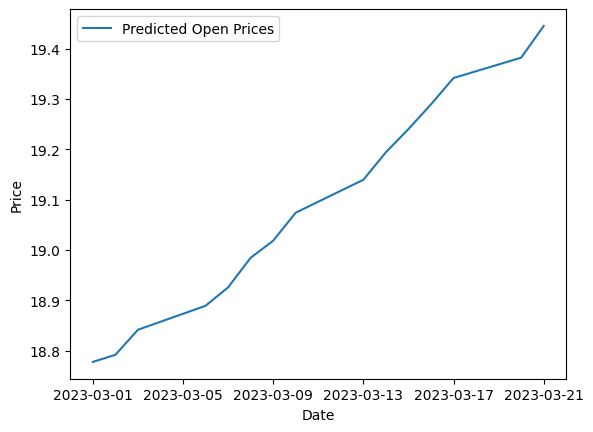

In [ ]:
## Model evaluation
# Predicting the stock prices
y_pred = best_model.predict(X_test)

# Inverse scaled the predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculated mean absolute error, mean squared error, root mean squared error, and mean absolute percentage error
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, mape

# Training evaluation
y_train_pred = best_model.predict(X_train)
y_train_pred_rescaled = scaler.inverse_transform(y_train_pred)
y_train_rescaled = scaler.inverse_transform(y_train)

train_mae, train_mse, train_rmse, train_mape = evaluate(y_train_rescaled, y_train_pred_rescaled)

# Test evaluation
y_pred = best_model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

test_mae, test_mse, test_rmse, test_mape = evaluate(y_test_rescaled, y_pred_rescaled)

# Created a DataFrame with the evaluation metrics
evaluation_df = pd.DataFrame(
    data=[[train_mae, train_mse, train_rmse, train_mape],
          [test_mae, test_mse, test_rmse, test_mape]],
    columns=['MAE', 'MSE', 'RMSE', 'MAPE'],
    index=['Training', 'Testing']
)

print(evaluation_df)

# Created a function to predict future prices
def predict_future_prices(model, last_sequence, num_days):
    predictions = []
    sequence = last_sequence.copy()

    for i in range(num_days):
        new_prediction = model.predict(sequence.reshape(1, SEQ_LEN, 1))
        predictions.append(new_prediction[0])
        sequence = np.append(sequence[1:], new_prediction)

    return np.array(predictions)

# Predicted the 'Open' prices from 1st March 2023 to 15th March 2023
num_days = 15
last_sequence = prices_scaled[-SEQ_LEN:].reshape(SEQ_LEN, 1)
future_predictions = predict_future_prices(best_model, last_sequence, num_days)

# Inverse scaled the predictions
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Created a DataFrame for the predicted 'Open' prices
prediction_dates = pd.date_range(start='2023-03-01', periods=num_days, freq='B')
predicted_prices_df = pd.DataFrame(data=future_predictions_rescaled, index=prediction_dates, columns=['Predicted Open'])

print(predicted_prices_df)

# Plotted the predicted 'Open' prices from 1st March 2023 to 15th March 2023
plt.plot(predicted_prices_df.index, predicted_prices_df['Predicted Open'], label='Predicted Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()